# Note
This module is working but currently the first connection time metadata on the FDSN server are incorrect. While the database gets updated, you can use the stationcount-20191109.ipynb notebook (the other one in this repository).

In [1]:
from obspy import read_inventory
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

In [2]:
def make_plot(ymax):
    fig, ax = plt.subplots(figsize=(14, 8))
    plt.ylim(0,ymax*1.05)
    plt.xlim(UTCDateTime(2016,11,1).datetime,(UTCDateTime.now()+timedelta(days=60)).datetime)
    # titles
    ax.set_ylabel('Raspberry Shake Stations')
    ax.set_xlabel('Time')
    # ticks
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)
    # labels
    ax.format_xdata = mdates.DateFormatter(fmt)
    fig.autofmt_xdate()
    # grid
    plt.grid(b=True, which='major', axis='both', dashes=(1,7))
    return fig, ax

def make_lists():
    '''
    gymnastics to create two lists:
    - first connect time
    - stationcount
    '''
    x = [] # list of times for x axis
    d = {} # directory
    # first get earliest starttimes for each entry from obspy station inventory
    for sta in inv[0]:
        d[sta.code] = sta.start_date.datetime
    for sta in inv[0]:
        if d[sta.code] > sta.start_date.datetime:
            d[sta.code] = sta.start_date.datetime

    # cull the list to stations active in the last two weeks
    for sta in inv[0]:
        if sta.is_active(starttime=end-timedelta(days=14)):
            pass
        else:
            try:
                del d[sta.code]
            except:
                pass

    # create a list of start times and sort
    for s in d:
        x.append(d[s])
    x.sort()

    time, stationcount = [], [] # lists to create/append
    c = 1 # counter
    for s in x:
        stationcount.append(c)
        time.append(s)
        c += 1

    return time, stationcount # x,y

In [3]:
# set data start/end times
fmt = '%Y-%m-%dT%H:%M:%S'.replace(':','%%3A')
start = UTCDateTime(2016, 12, 1, 0, 0, 0).datetime # (YYYY, m, d, H, M, S)
end = UTCDateTime.now().datetime # (YYYY, m, d, H, M, S)
s = start.strftime(fmt)
e = end.strftime(fmt)

# set channels (comma separated list)
ch = 'EHZ,SHZ'.replace(',', '%2C')

# get inventory
query = 'https://fdsnws.raspberryshakedata.com/fdsnws/station/1/query?network=AM&station=*&location=00&channel=%s&nodata=404' % (ch)
print('Downloading inventory from:\n%s' % query)
inv = read_inventory(query)

https://fdsnws.raspberryshakedata.com/fdsnws/station/1/query?network=AM&station=*&location=00&channel=EHZ%2CSHZ&nodata=404


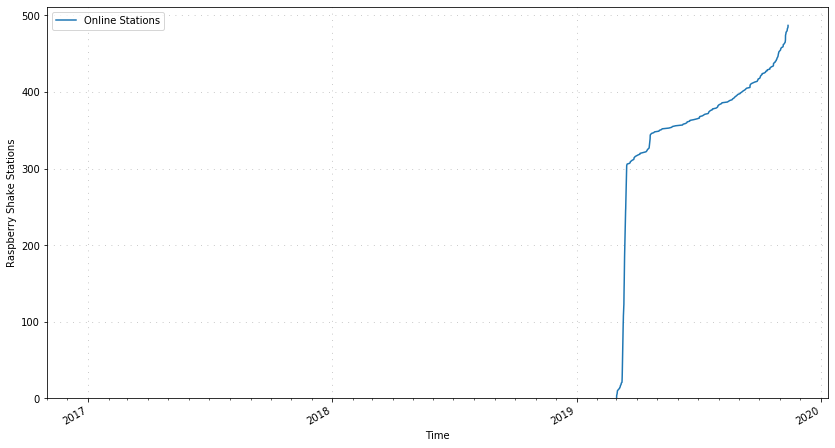

In [4]:
time, stationcount = make_lists()
fig, ax = make_plot(ymax=max(stationcount))
plt.plot(time, stationcount, label='Online Stations')
plt.legend(loc='upper left')
plt.show()